### Compare results of pyet w/Maggi for 2015 (Dry year) at LDP

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import csv
import os
from datetime import datetime
import re

import pyet
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

C:\Users\skyebensel\AppData\Local\Temp\ipykernel_8752\2953368902.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#for 2015
df=pd.read_csv('LDP_HrlySummary_2015.csv')
df['Date'] = pd.to_datetime(df['DateTime'])
df


,DateTime,Precipitation-mm,AirTemperature-C,SolarRadiation-Watts/m2,NetRadiation-Watts/m2,RelativeHumidity-%,WindDirection-Degree,WindSpeed-m/s,SnowDepth-cm,Date
0,1/1/2015 0:00,0.0,-12.8,0.0,17.70,86.40,60.5,0.55,50.5,2015-01-01 00:00:00
1,1/1/2015 1:00,0.0,-14.5,0.0,14.10,85.50,18.6,0.68,51.0,2015-01-01 01:00:00
2,1/1/2015 2:00,0.0,-13.4,0.0,12.80,86.00,352.9,0.65,51.4,2015-01-01 02:00:00
3,1/1/2015 3:00,0.0,-12.6,0.0,11.80,86.20,29.5,1.10,51.6,2015-01-01 03:00:00
4,1/1/2015 4:00,0.0,-13.2,0.0,12.90,86.00,348.3,0.77,51.7,2015-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
8755,12/31/2015 19:00,570.5,-10.3,0.0,-61.16,70.44,271.8,2.92,74.2,2015-12-31 19:00:00
8756,12/31/2015 20:00,570.5,-10.1,0.0,-61.59,69.16,264.0,3.12,74.1,2015-12-31 20:00:00
8757,12/31/2015 21:00,570.5,-10.4,0.0,-60.15,68.78,246.0,2.71,74.0,2015-12-31 21:00:00
8758,12/31/2015 22:00,570.5,-10.4,0.0,-60.68,68.84,254.2,3.25,74.0,2015-12-31 22:00:00


In [3]:
df['SolarRadiation-Watts/m2']=df['SolarRadiation-Watts/m2']*3600


In [4]:
df['NetRadiation-Watts/m2']=df['NetRadiation-Watts/m2']*3600

In [5]:
daily_data = df.groupby(df['Date'].dt.strftime('%m/%d/%Y')).agg({
    'Precipitation-mm': 'sum',
    'AirTemperature-C': ['min', 'max', 'mean'],  # Calculate min, max, and mean for temperature
    'SolarRadiation-Watts/m2': 'sum',
    'NetRadiation-Watts/m2': 'sum',
    'RelativeHumidity-%': ['min', 'max', 'mean'],
    'WindDirection-Degree': 'mean',
    'WindSpeed-m/s': 'mean',
    'SnowDepth-cm': 'sum'
}).reset_index()

daily_data['SolarRadiation-Watts/m2'] = (daily_data['SolarRadiation-Watts/m2'])/1000000
daily_data['NetRadiation-Watts/m2'] = (daily_data['NetRadiation-Watts/m2'])/1000000


daily_data.columns = ['Date', 'Precipitation_mm', 'Tmin_C', 'Tmax_C', 'Tmean_C',
                       'SolarRadiation_MJ/m2/day', 'NetRadiation_MJ/m2/day', 'RelativeHumidity_min','RelativeHumidity_max','RelativeHumidity_mean',
                       'WindDirection_degree', 'WindSpeed_m/s', 'SnowDepth_cm']

# Save the transformed data to a new CSV file
daily_data.to_csv('LDP_2015.csv', index=False)

In [10]:
df=pd.read_csv('LDP_2015.csv')
tmean=df['Tmean_C']


In [11]:
pet_penman_2015 = pyet.combination.pm(tmean,tmax=df['Tmax_C'],tmin=df['Tmin_C'],wind=df['WindSpeed_m/s'],rs=df['SolarRadiation_MJ/m2/day'],rn=df['NetRadiation_MJ/m2/day'],rhmax=df['RelativeHumidity_max'],
                    elevation=1850,
                    rhmin=df['RelativeHumidity_min'],rh=df['RelativeHumidity_mean'])

In [15]:
df['pet_penman_2015']=pet_penman_2015
df

,Date,Precipitation_mm,Tmin_C,Tmax_C,Tmean_C,SolarRadiation_MJ/m2/day,NetRadiation_MJ/m2/day,RelativeHumidity_min,RelativeHumidity_max,RelativeHumidity_mean,WindDirection_degree,WindSpeed_m/s,SnowDepth_cm,pet_penman_2019,pet_penman_2015
0,01/01/2015,0.0,-14.5,-10.1,-12.462500,8.578692,0.130932,82.50,86.40,84.637500,95.325000,1.126250,1215.0,0.093936,0.093936
1,01/02/2015,0.1,-12.1,-6.0,-8.887500,6.175692,-1.521936,76.39,84.40,80.721667,59.366667,1.083333,1182.7,0.000000,0.000000
2,01/03/2015,3.1,-7.2,-1.8,-4.775000,9.598824,-0.557100,72.26,89.50,80.154583,124.037500,0.977083,1157.2,0.084728,0.084728
3,01/04/2015,17.8,-3.6,-0.2,-2.391667,1.938168,-0.085392,74.79,95.50,86.924167,127.912500,0.739583,1161.5,0.093941,0.093941
4,01/05/2015,148.2,-0.2,4.9,1.520833,2.072412,-0.226980,70.05,92.40,81.155833,87.791667,1.607083,1265.1,0.288165,0.288165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2015,13687.8,-10.9,-7.2,-9.512500,3.654720,-1.690884,55.62,77.96,66.114583,243.795833,4.028750,1932.7,0.415203,0.415203
361,12/28/2015,13691.5,-11.8,-9.1,-10.108333,9.021528,-0.081576,53.60,87.60,75.501250,140.516667,2.625417,1890.5,0.322845,0.322845
362,12/29/2015,13692.0,-11.2,-8.9,-10.062500,3.701088,-0.155988,85.60,88.40,87.370833,126.883333,2.311250,1815.2,0.119522,0.119522
363,12/30/2015,13692.0,-10.3,-7.9,-9.691667,6.263640,-0.442368,65.83,84.60,76.882083,162.850000,1.633750,1784.1,0.178751,0.178751


C:\Users\skyebensel\AppData\Local\Temp\ipykernel_8752\206409429.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 4)
C:\Users\skyebensel\AppData\Local\Temp\ipykernel_8752\206409429.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45,fontsize=5)
C:\Users\skyebensel\AppData\Local\Temp\ipykernel_8752\206409429.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45,fontsize=5)


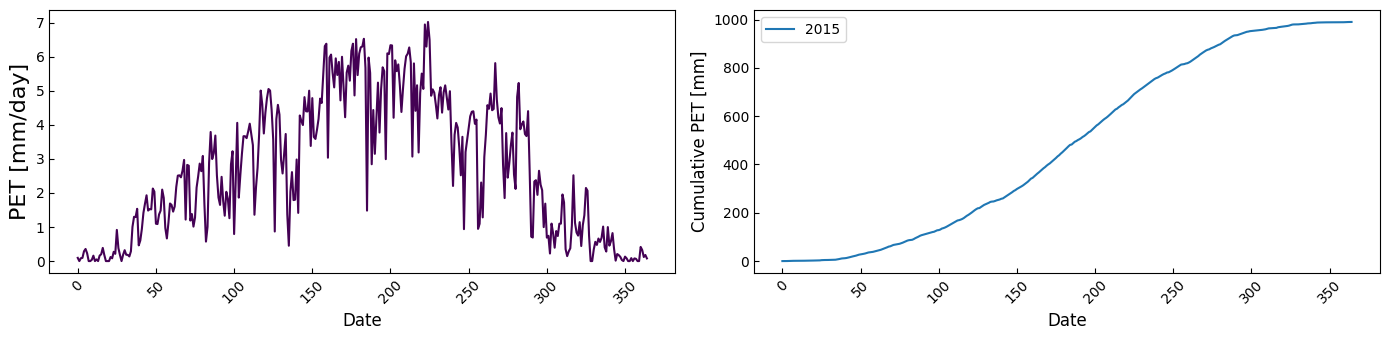

In [16]:
from matplotlib import cm
viridis = cm.get_cmap('viridis', 4)
colors = [viridis(i) for i in range(0, 4)]

fig, axs = plt.subplots(figsize=(14,3.5), ncols=2)
axs[0].plot(df['pet_penman_2015'],c=colors[0],label="2015")
axs[0].set_ylabel("PET [mm/day]", fontsize=16)
axs[1].plot(df['pet_penman_2015'].cumsum(),label="2015")
axs[1].set_ylabel("Cumulative PET [mm]", fontsize=12)

for i in (0,1):
    axs[i].set_xlabel("Date", fontsize=12)
    #axs[i].set_xticks(df['Date'][df['Date'].dt.day == 1])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45,fontsize=5)
    axs[i].tick_params("both", direction="in", labelsize=10)
plt.legend()
plt.tight_layout()
#plt.savefig("Figure1.png", dpi=300)